# Informe estadístico acerca de los parquets de taxis de NYC para Enero de 2025

**Libreria Pandas**

**Actividades ha realizar**

Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis  
Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero  
Qué tipo de taxi recibe más propinas en promedio  
Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi    
Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero  
Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio


**1- Importar la libreria.**

In [3]:
import pandas as pd

**2.- Carga de los Datasets**
*Al inicio del análisis, intenté cargar los datasets completos de taxis utilizando la siguiente instrucción:*

yellow_df = pl.read_parquet(ruta + "yellow_tripdata_2025-01.parquet")  
green_df = pl.read_parquet(ruta + "green_tripdata_2025-01.parquet")  
fhv_df = pl.read_parquet(ruta + "fhv_tripdata_2025-01.parquet")  
fhvhv_df = pl.read_parquet(ruta + "fhvhv_tripdata_2025-01.parquet")  

Sin embargo, esto provocó que el entorno se congelara o cerrara de forma inesperada, debido a que los archivos .parquet contienen una gran cantidad de columnas y registros, lo cual saturó la memoria del equipo.

Para evitar estos errores adopté una solución más eficiente: cargar únicamente las columnas necesarias para el análisis estadístico requerido. Las columnas las encontré realizando el mismo notebook pero en google colab que si me permitió revisar las columnas con read_parquet y asi poder tomar solo las que necesito para este código.

**-> Reading from a Parquet file Store using read_parquet():**

In [4]:
# 1.- Debo cargar el archivo parquet y guardar el DataFrame correspondiente en la variable yellow_df (referenica a DataFrame), haré lo mismo para el resto de DataFrames.
yellow_df = pd.read_parquet(
    "../data/taxi/yellow_tripdata_2025-01.parquet",
    columns=["tpep_pickup_datetime", "total_amount", "trip_distance", "tip_amount", "tolls_amount"] #ya que solo quiero las columnas especificas utilizo columns["nombreDeCOlumna"]
)

green_df = pd.read_parquet(
    "../data/taxi/green_tripdata_2025-01.parquet",
    columns=["lpep_pickup_datetime", "total_amount", "trip_distance", "tip_amount", "tolls_amount"]
)
#For hire
fhv_df = pd.read_parquet(
    "../data/taxi/fhv_tripdata_2025-01.parquet",
    columns=["pickup_datetime"]
)
#High-Volumne For Hire
fhvhv_df = pd.read_parquet(
    "../data/taxi/fhvhv_tripdata_2025-01.parquet",
    columns=["pickup_datetime", "base_passenger_fare", "trip_miles", "tips", "tolls"]
)


# Familiarización con los datasets (columnas y tipos)

Identificar que columna representa:  
Fecha/hora de recogida  
Ingresos brutos  
Distancia recorrida  
Propina  
Importe de peajes

* -> **property DataFrame.dtypes  
Return the dtypes in the DataFrame.**

In [5]:
print("*** Taxi Amarillo ***")
print(yellow_df.dtypes)

*** Taxi Amarillo ***
tpep_pickup_datetime    datetime64[us]
total_amount                   float64
trip_distance                  float64
tip_amount                     float64
tolls_amount                   float64
dtype: object


Fecha/hora de recogida: *tpep_pickup_datetime*    
Ingresos brutos: *total_amount*  
Distancia recorrida: *trip_distance*  
Propina: *tip_amount*  
Importe de peajes: *tolls_amount*

In [6]:
print("*** Taxi Verde ***")
print(green_df.dtypes)

*** Taxi Verde ***
lpep_pickup_datetime    datetime64[us]
total_amount                   float64
trip_distance                  float64
tip_amount                     float64
tolls_amount                   float64
dtype: object


Fecha/hora de recogida: *lpep_pickup_datetime*    
Ingresos brutos: *total_amount*  
Distancia recorrida: *trip_distance*  
Propina: *tip_amount*  
Importe de peajes: *tolls_amount*

In [7]:
print("*** FHV Taxi ***")
print(fhv_df.dtypes)

*** FHV Taxi ***
pickup_datetime    datetime64[us]
dtype: object


Fecha/hora de recogida: *pickup_datetime*    
Ingresos brutos: *x*  
Distancia recorrida: *x*  
Propina: *x*  
Importe de peajes: *x*

In [8]:
print("*** HVFHV Taxi ***")
print(fhvhv_df.dtypes)

*** HVFHV Taxi ***
pickup_datetime        datetime64[us]
base_passenger_fare           float64
trip_miles                    float64
tips                          float64
tolls                         float64
dtype: object


Fecha/hora de recogida: *pickup_datetime*  
Ingresos brutos: *base_passenger_fare*  
Distancia recorrida: *trip_miles*  
Propina: *tips*  
Importe de peajes: *tools*

# 1.- Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [9]:
# 1.- Obtengo los ingresos brutos de cada taxi y después sumo los 3 para obtener el promedio total

avg_yellow = yellow_df["total_amount"].mean()

# .mean() calcula el promedio de los valores numéricos de la columna que obtuve llamandola mediante ["NombreCOolumna"]
# ahora tengo una serie para la cual calculo el promedio com .mean()
# a diferencia de polars, con pandas no es necesario usar .select ni .item() como en Polars ya que se traabaja directamente con series

print(f"Promedio de ingresos brutos del Taxi Amarillo: {avg_yellow:.2f}")

Promedio de ingresos brutos del Taxi Amarillo: 25.61


In [10]:
avg_green = green_df["total_amount"].mean()
print(f"Promedio de ingresos brutos Green Taxi: {avg_green:.2f}")

avg_fhvhv = fhvhv_df["base_passenger_fare"].mean()
print(f"Promedio de ingresos brutos HVFHV Taxi: {avg_fhvhv:.2f}")

Promedio de ingresos brutos Green Taxi: 22.63
Promedio de ingresos brutos HVFHV Taxi: 24.27


**3.1 - Promedio general**

In [11]:
# Para el promedio general debemos unificar las columnas de ingresos de los 3 DataFrames
# esto ya que cada DataFrame tiene un nombre diferente para la columna de los ingresos brutos.


# Creé tres series individuales a partir de las columnas de ingresos, y las llamaré "ingreso".
# para esto, llamo a la columna que quiero usar mediante [""] y luego usando .rename nombro a la columna
ingresos_yellow = yellow_df["total_amount"].rename("ingreso")
ingresos_green = green_df["total_amount"].rename("ingreso")
ingresos_fhvhv = fhvhv_df["base_passenger_fare"].rename("ingreso")   #aqui el problema, es la única que se llama diferente.

# se unen los ingresos en una sola serie
promedio_general = pd.concat([ingresos_yellow, ingresos_green, ingresos_fhvhv])


avg_general = promedio_general.mean() #prom general de los ingresos que ya unifique en promedio_general

# Promedio general -> avg_general
print(f"Promedio General: ${avg_general:.2f}")

Promedio General: $24.46


# Distancia total por tipo de taxi

In [12]:
# 1: Se calcula la distancia total recorrida por cada tipo de taxi

# "trip_distance"
yellow_distancias = yellow_df["trip_distance"].sum()
green_distancias = green_df["trip_distance"].sum()

# "trip_miles"
hvfhv_distancias = fhvhv_df["trip_miles"].sum()

In [13]:
print("Distancia total recorrida en enero:")
print(f"Taxi Amarillo:  {yellow_distancias:.2f}  millas") # le doy formato
print(f"Taxi Verde:     {green_distancias:.2f}   millas")
print(f"HVFHV:          {hvfhv_distancias:.2f}  millas")


Distancia total recorrida en enero:
Taxi Amarillo:  20347886.73  millas
Taxi Verde:     1040575.25   millas
HVFHV:          98978656.51  millas


# 2.- Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [14]:
# diccionario llamado 'distanciasT' que guarda la suma total de distancias recorridas por cada tipo de taxi.
distanciasT = { # identifica los tipos de taxi
    "Taxi Amarillo": yellow_distancias,
    "Taxi Verde": green_distancias,
    "HVFHV": hvfhv_distancias
}

#usando la función max() puedo recorrer las claves del diccionario, y el argumento 'key=totales.get' le indica a max() que
# compare las claves con base en sus valores (distancias). Asi max obtiene el valor máximo de esas distancias
tipo_max = max(distanciasT, key=distanciasT.get)
print(f"\nEl {tipo_max} recorrió más distancia.")



El HVFHV recorrió más distancia.


# 3.- Qué tipo de taxi recibe más propinas en promedio

In [15]:
# 1: Calculamos el prodistanciasmedio de propinas por tipo de taxi

# "tip_amount"
yellow_tip_avg = yellow_df["tip_amount"].mean()
green_tip_avg = green_df["tip_amount"].mean()

# "tips"
fhvhv_tip_avg = fhvhv_df["tips"].mean()

print("Promedio de propinas:")
print(f"Taxi Amarillo:  ${yellow_tip_avg:.2f}")
print(f"Taxi Verde:     ${green_tip_avg:.2f}")
print(f"HVFHV:          ${fhvhv_tip_avg:.2f}")

propinas = {
    "Taxi Amarillo": yellow_tip_avg,
    "Taxi Verde": green_tip_avg,
    "HVFHV": fhvhv_tip_avg
}

# usamos para de nuevo para obtener el valor maximo de los valores en el diccionario
tipo_max_propina = max(propinas, key=propinas.get)
print(f"\nEl {tipo_max_propina} es el taxi que recibe más propinas en promedio:")

Promedio de propinas:
Taxi Amarillo:  $2.96
Taxi Verde:     $2.48
HVFHV:          $1.04

El Taxi Amarillo es el taxi que recibe más propinas en promedio:


# 4.- Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi  
**Para poder realizarlo necesito importar matplotlib.**

In [16]:
import matplotlib.pyplot as plt

In [17]:
# 1. Calcular el total de peajes por tipo de taxi

# "tolls_amount"
yellow_tolls = yellow_df["tolls_amount"].sum()
green_tolls = green_df["tolls_amount"].sum()

# "tolls"
hvfhv_tolls = fhvhv_df["tolls"].sum()

# creamos una lista con los nombres de cada tipo de taxi, ya que las puedo usar como valores X en el gráfico
tipos = ["Taxi Amarillo", "Taxi Verde", "HVFHV"]  #eje X

# Lista con los valores de peajes totales
valores = [yellow_tolls, green_tolls, hvfhv_tolls]


Gráficos:

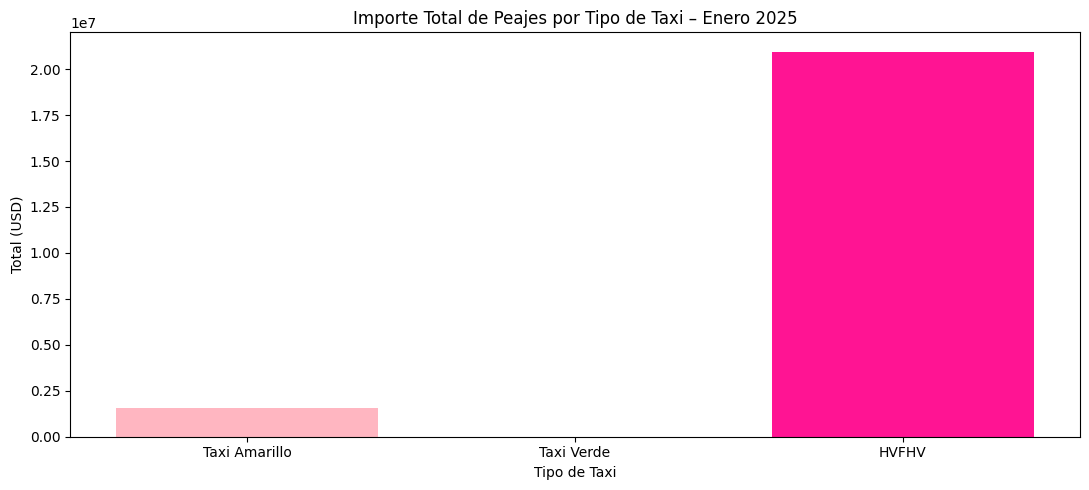

In [18]:
plt.figure(figsize=(11, 5)) #tamaño del gráfico figsixe = (ancho,alto)

# Para dibujar las barras:
# plt.bar(lista_de_categorias (x), lista_de_valores (y), color=[colores_opcionales_cada_barra])
# lista_de_categorias -> etiquetas en el eje X
# lista_de_valores -> altura de cada barra (por ejemplo, peajes totales)
plt.bar(tipos, valores, color=["lightpink", "palevioletred", "deeppink"])  
plt.title("Importe Total de Peajes por Tipo de Taxi – Enero 2025")  # Título
plt.ylabel("Total (USD)")
plt.xlabel("Tipo de Taxi")
plt.tight_layout()#ajusta el tamaño, para que no see corte
plt.show()

# 5.- Mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

Para esto usaré la libreria seaborn ya que es para gráficos estadísticos, sobretodo mapas de calor y nuevamente  matplotlib.pyplot paraa los gráficos


In [19]:
import seaborn as sns  #gráficos estadísticos
import matplotlib.pyplot as plt

In [20]:
# 1.- Defino una función que recibirá el día, hora y etiqueta de tipo de taxi desde una columna de fecha.
# Esta función sirve para que pueda convertir la información de fecha/hora, que originalmente tiene  diferentes nombres en los
# dataFrames en un mismo formato.
# Así, no importa cual era su nombre original de la columna, todos los DataFrames ahora tendrán las mismas columnas:
# "datetime", "dia", "hora" y "tipo_taxi".

def extraer_dia_hora(df, col_fecha, fuente):

    # Creamos una copia del DataFrame, pero solo con la columna de fecha especificada.
    # evita modificar el DataFrame original.
    df_copy = df[[col_fecha]].copy() # "Toma del DataFrame df la columna cuyo nombre es col_fecha" cuando haga la llamada a la funcipon
                                     # le diré los parámetros df y col_fecha

    #pandas.to_datetime -> Convert argument to datetime.
    # con pandas convierto la columna de fecha a tipo datetime.
    df_copy["datetime"] = pd.to_datetime(df_copy[col_fecha]) # Converte la columna de fecha a tipo datetime y la guarda
    # en una nueva columna llamada "datetime". Asi se  estandariza el nombre de la columna para que todos los DataFrames
    # usen el mismo.


    # Extrae el día del mes y lo guarda en una nueva columna llamada "dia".
    # .dt.day devuelve valores de 1 a 31 segun el mes
    df_copy["dia"] = df_copy["datetime"].dt.day

    # hora en formato de 24h y se gaurda en la columna "hora".
    df_copy["hora"] = df_copy["datetime"].dt.hour

    #nueva columna llamada "tipo_taxi" que contiene la fuente que será el nombre para identificar el tipo de taxi.
    df_copy["tipo_taxi"] = fuente

    # regresa el DataFrame resultante con todos los cambios anteriores de columnas
    return df_copy


In [21]:
# le aplicamos la función a todos los DataFrame: la funcion recibirá el df, nombre de la columan y el nombre del tipo de taxi
yellow_time = extraer_dia_hora(yellow_df, "tpep_pickup_datetime", "Yellow")
green_time = extraer_dia_hora(green_df, "lpep_pickup_datetime", "Green")
hvfhv_time = extraer_dia_hora(fhvhv_df, "pickup_datetime", "HVFHV")

In [22]:
tiempo_total = pd.concat([yellow_time, green_time, hvfhv_time]) # une los tres DataFrames para analizarlos  juntos

# Agrupamos por día y hora para contar cuántos viajes hubo en cada combinación
conteo = tiempo_total.groupby(["dia", "hora"]).size().unstack(fill_value=0)

#conteo = (
#   tiempo_total
#   .groupby(["dia","hora"]).size().unstack(fill_value=0)
#   .groupby(["dia", "hora"])  Agrupa el DataFrame por día y por hora. Esto agrupa los viajes que se dieron el mismo día y a la misma hora.
#   .size()  #Cuenta cuántos viajes hay en la agrupacion anterior
                                  # Resultado: una Serie con tuplas (dia, hora) como índice y la cantidad de viajes como valor.

#   .unstack(fill_value=0)       # Convierte el segundo nivel del índice ("hora") en columnas.
                               # asi, cada fila es un día y cada columna es una hora (0 a 23).
                                 # Los huecos (si hay dia/hora sin viajes) se rellenan con 0.
#)

In [23]:
# Ordenamos el DataFrame por índice para que los dias sean en forma cronológica.
conteo_df = conteo.sort_index()  # Ya tiene 'dia' como índice desde el unstack() anterior


**Importamos seaborn y matplotlib para la visualización**

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

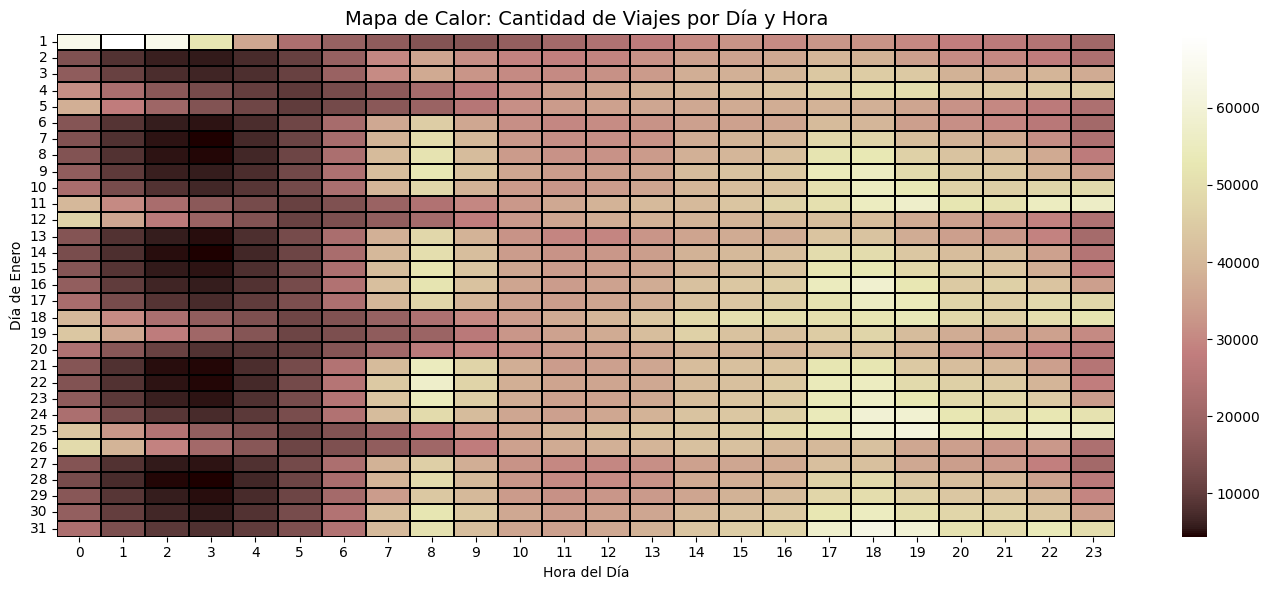

In [25]:
plt.figure(figsize=(14, 6))

#  mapa de calor
sns.heatmap(
    conteo_df,       # DataFrame que tiene los días como filas y horas como columnas
    cmap="pink",    # paleta de colores "pink"
    linewidths=0.3,
    linecolor='black'       # Color de las líneas entre celdas
)

# Título
plt.title("Mapa de Calor: Cantidad de Viajes por Día y Hora", fontsize=14)
plt.xlabel("Hora del Día")
plt.ylabel("Día de Enero")
plt.tight_layout() #para que no se corte
plt.show()

# 6.- Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

In [26]:
# siguiendo la logica de la funcion anterior

def extraer_dia(df, col_fecha, tipo):
    df_copy = df[[col_fecha]].copy()  # Creamos una copia solo con la columna de fecha
    df_copy["fecha"] = pd.to_datetime(df_copy[col_fecha])  # conviere a datetime
    df_copy["dia"] = df_copy["fecha"].dt.day  # extrea el número del día del mes
    df_copy["tipo_taxi"] = tipo  #para etiquetar el tipo de taxi
    return df_copy[["dia", "tipo_taxi"]]  # solo nos quedamos con  las columnas necesarias

In [27]:
# se le aplica la función a todos los DataFrames
yellow_dia = extraer_dia(yellow_df, "tpep_pickup_datetime", "Yellow")
green_dia = extraer_dia(green_df, "lpep_pickup_datetime", "Green")
hvfhv_dia = extraer_dia(fhvhv_df, "pickup_datetime", "HVFHV")

In [ ]:
# Concatena todos los resultados para analizarlos juntos
dias_total = pd.concat([yellow_dia, green_dia, hvfhv_dia], ignore_index=True)

In [ ]:
# Agrupamos por tipo de taxi y día, y contamos la cantidad de viajes en cada combinación
conteo = (
    dias_total
    .groupby(["tipo_taxi", "dia"])   # Agrupación doble: por tipo de taxi y día
    .size()   # cantidad de registros en cada grupo
    .unstack(fill_value=0) # convierte los días en columnas, filas por tipo de taxi
)

In [ ]:
conteo_df = conteo.sort_index()

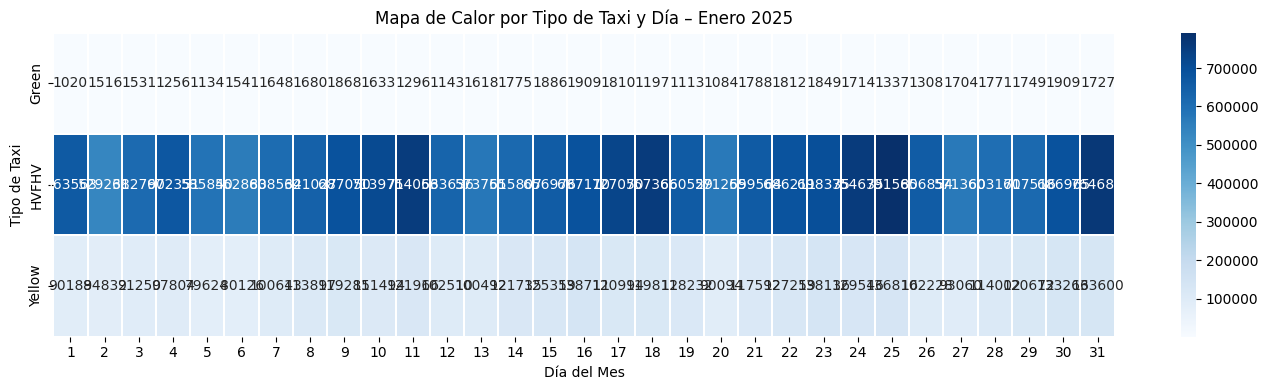

In [ ]:
plt.figure(figsize=(14, 4))
sns.heatmap(
    conteo_df,
    cmap="Blues",
    annot=True,
    fmt=".0f",
    linewidths=0.3
)

plt.title("Mapa de Calor por Tipo de Taxi y Día – Enero 2025")
plt.xlabel("Día del Mes")
plt.ylabel("Tipo de Taxi")
plt.tight_layout()
plt.show()